# IMPORTS

In [27]:
import ta #technical analysis of timeseries data
from binance import Client
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)
plt.style.use('ggplot')
import pandas as pd
import numpy as np
client = Client()


In [10]:
#example of client
org='ETHBTC'
frame = pd.DataFrame(client.get_historical_klines(org,'15m','1000 hours ago UTC')) # 15m -> 15 minutes and 1000 hours ago data

In [11]:
frame.shape

(4000, 12)

In [12]:
frame.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,1647243900000,0.06624400,0.06625800,0.06612400,0.06619200,1035.78640000,1647244799999,68.56693544,1958,486.75630000,32.22136005,0
1,1647244800000,0.06619100,0.06640000,0.06615000,0.06636900,1306.68090000,1647245699999,86.59358458,2628,689.84740000,45.71766626,0
2,1647245700000,0.06637200,0.06650900,0.06635000,0.06643700,659.53560000,1647246599999,43.81656959,1607,394.53120000,26.20877560,0
3,1647246600000,0.06643600,0.06644100,0.06637200,0.06639100,495.41270000,1647247499999,32.89829257,1047,240.26520000,15.95503634,0
4,1647247500000,0.06639100,0.06644600,0.06632500,0.06637400,615.14000000,1647248399999,40.83326243,1325,315.93300000,20.97134125,0


In [18]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       4000 non-null   int64 
 1   1       4000 non-null   object
 2   2       4000 non-null   object
 3   3       4000 non-null   object
 4   4       4000 non-null   object
 5   5       4000 non-null   object
 6   6       4000 non-null   int64 
 7   7       4000 non-null   object
 8   8       4000 non-null   int64 
 9   9       4000 non-null   object
 10  10      4000 non-null   object
 11  11      4000 non-null   object
dtypes: int64(3), object(9)
memory usage: 375.1+ KB


In [16]:
frame.describe()

,0,6,8
count,4.000000e+03,4.000000e+03,4000.00000
mean,1.649043e+12,1.649044e+12,1526.51200
std,1.039360e+09,1.039360e+09,1100.37382
min,1.647244e+12,1.647245e+12,154.00000
25%,1.648144e+12,1.648145e+12,853.75000
50%,1.649043e+12,1.649044e+12,1228.50000
75%,1.649943e+12,1.649944e+12,1812.50000
max,1.650843e+12,1.650844e+12,15518.00000


# get data

In [22]:
def get_data(org):
    frame = pd.DataFrame(client.get_historical_klines(org,'15m','1000 hours ago UTC'))
    frame = frame.iloc[:,0:6]
    frame.columns = ['Time','Open','High','Low','Close','Volume']
    frame.set_index('Time',inplace=True)
    frame.index = pd.to_datetime(frame.index,unit='ms')
    frame = frame.astype('float')
    return frame



In [25]:
data=get_data('BTCUSDT')

<AxesSubplot:xlabel='Time'>

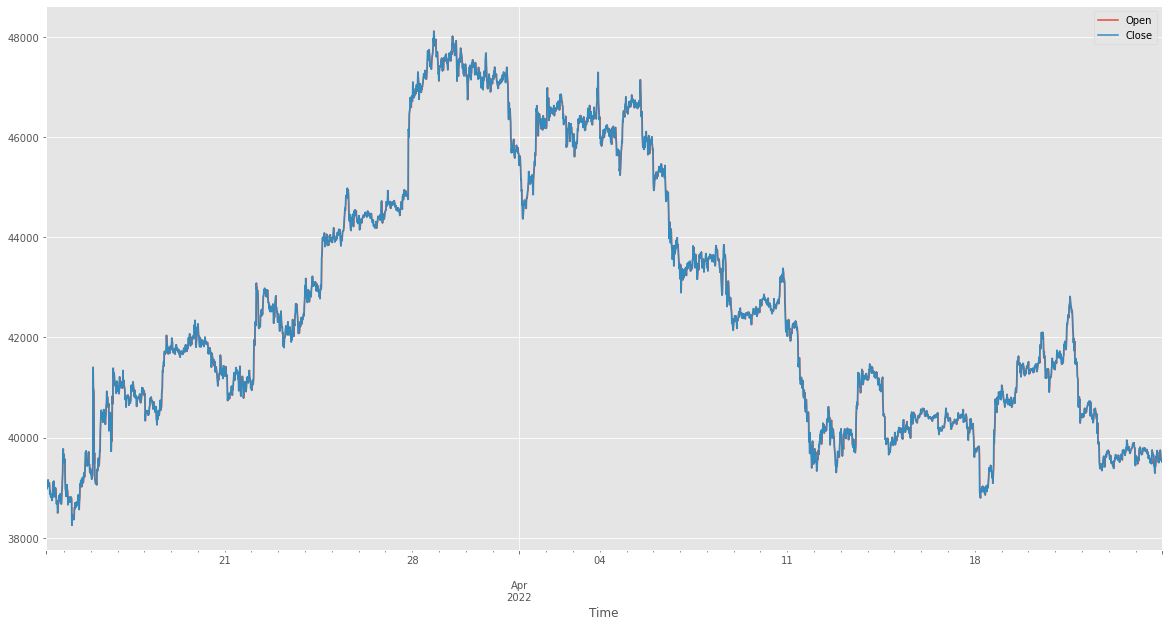

In [29]:
data.loc[:,['Open','Close']].plot()

# preprocess 

In [30]:
def applytech(df):
    for i in range(2,10,2):
        df['rsi_'+str(i)]=ta.momentum.rsi(df.Close,window=i)
        df['SMA_'+str(i*10)] = df.Close.rolling(i*10).mean()
    df['macd'] = ta.trend.macd_diff(df.Close)
    df.dropna(inplace=True)
    return df

In [31]:
df = applytech(data)

Keys to know:
* RSI = The relative strength index is a technical indicator used in the analysis of financial markets. It is intended to chart the current and historical strength or weakness of a stock or market based on the closing prices of a recent trading period.
* SMA = Simple Moving Average it is simply the average price over the specified period.
* MACD  = Moving Average Convergence Divergence (MACD) is a trend-following momentum indicator that shows the relationship between two moving averages of a security's price. Traders use the MACD to identify when bullish or bearish momentum is high in order to identify entry and exit points for trades.

<AxesSubplot:xlabel='Time'>

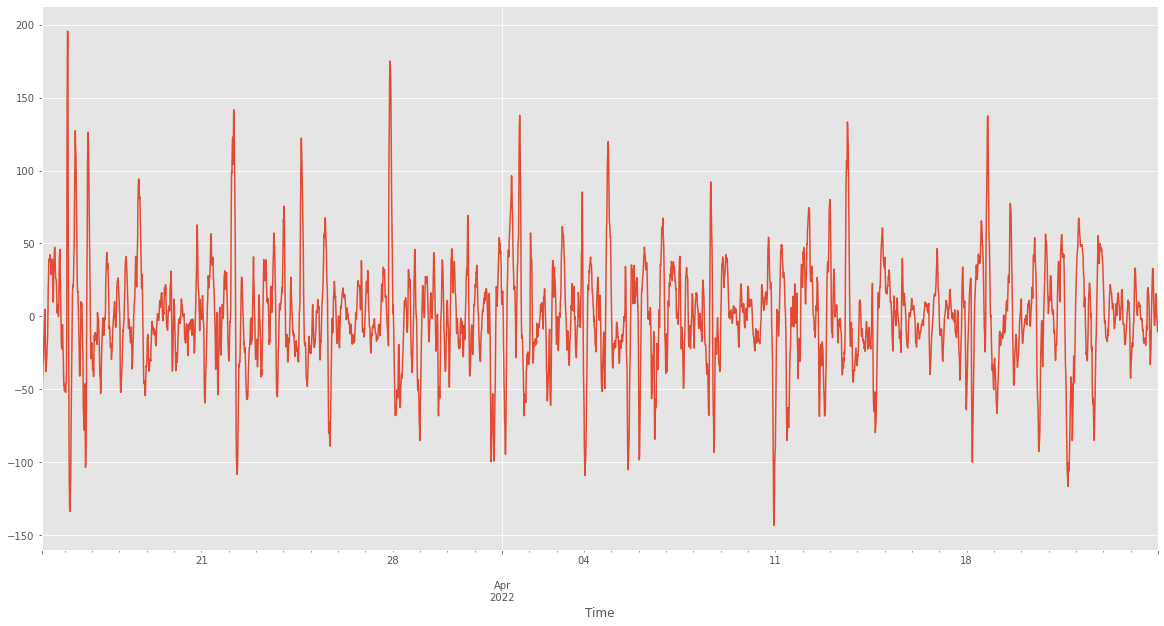

In [33]:
df['macd'].plot()

In [36]:
def x_y(df,period):
    '''
    period is next 10m or 15m
    
    '''  
    y = df.Close.shift(-period)-df.Close  # differene from now to pervious time stamp by period as 1 
    y = y[:-period] # cutoff the last element where it is nan
    x  = df[: -period]
    y = np.where(y>0,1,0)
    return x,y


In [37]:
x,y=x_y(df,1)

In [41]:
x.head()

,Open,High,Low,Close,Volume,rsi_2,SMA_20,rsi_4,SMA_40,rsi_6,SMA_60,rsi_8,SMA_80,macd
Time,,,,,,,,,,,,,,
2022-03-15 03:45:00,38659.15,38795.06,38655.59,38768.41,333.91313,44.872545,39195.7850,36.084181,38998.94775,35.632050,38963.374333,36.994370,38968.897875,-63.955095
2022-03-15 04:00:00,38768.41,38799.78,38704.28,38771.71,204.24706,46.254674,39148.4560,36.681988,39000.53575,35.998912,38961.771000,37.250666,38965.293750,-58.028049
2022-03-15 04:15:00,38771.72,38865.18,38768.01,38811.30,175.56476,66.441983,39100.2390,44.922225,39008.44200,40.852087,38962.859333,40.565518,38963.170750,-48.528034
2022-03-15 04:30:00,38811.29,38843.00,38777.54,38816.37,143.83138,69.387052,39063.7825,46.119530,39015.12650,41.533405,38962.584833,41.021516,38961.188000,-39.378938
2022-03-15 04:45:00,38816.36,38848.46,38747.00,38786.01,107.89775,33.830035,39019.5145,39.298672,39017.90175,38.358388,38961.120000,38.975084,38957.550625,-33.100711


In [40]:
y # 1 is raise 0 is drop

array([1, 1, 1, ..., 0, 0, 1])

# ML

In [43]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=1,shuffle=False) # shuffle is false as we deal with time series data

In [47]:
print(f'shape of train = {x_train.shape}, shape of test = {x_test.shape}')
print(f'Train till last time = {x_test.index[-1]}')

shape of train = (2744, 14), shape of test = (1176, 14)
Train till last time = 2022-04-24 23:30:00


In [49]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=1)
clf.fit(x_train,y_train)

RandomForestClassifier(random_state=1)

In [50]:
pred = clf.predict(x_test)

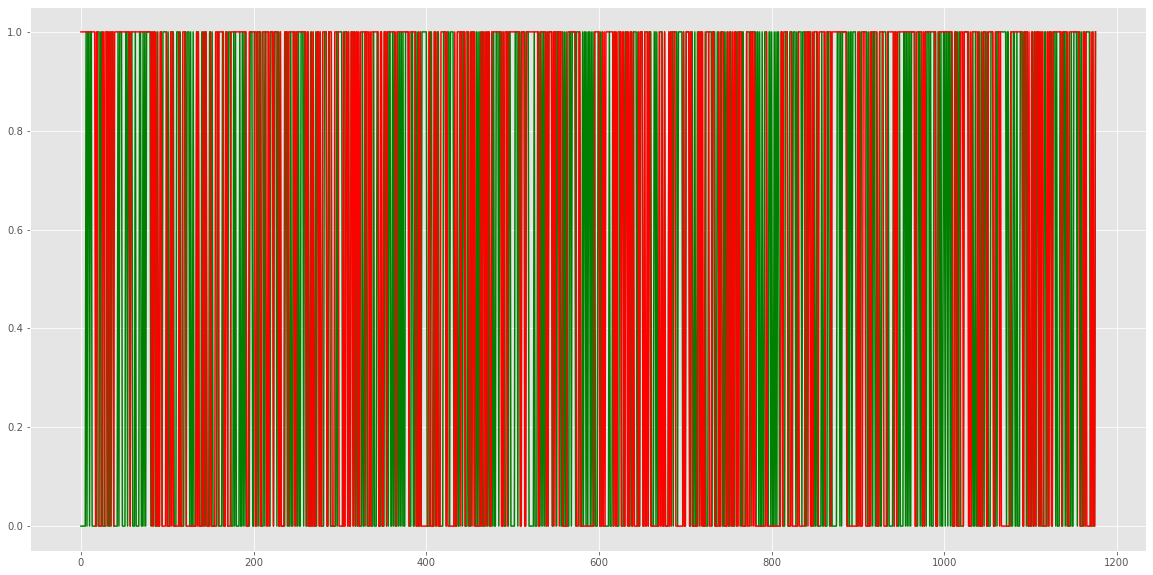

In [51]:
plt.plot(y_test,c='g')
plt.plot(pred,c='r')

In [64]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,roc_auc_score,roc_curve
print(f'{confusion_matrix(y_test,pred)}')

tn,fp,fn,tp = confusion_matrix(y_test,pred).ravel()
print('\n')
print('########')
print('\n')
print(f'Tp = {tp}')

print(f'Fp = {fp}')

print(f'Fn = {fn}')

print(f'Tn = {tn}')

[[249 331]
 [233 363]]


########


Tp = 363
Fp = 331
Fn = 233
Tn = 249


In [58]:
print(f'Acc - score = {accuracy_score(y_test,pred)}')

Acc - score = 0.5204081632653061


In [62]:
print(f'Precision - score = {precision_score(y_test,pred)}')

Precision - score = 0.5230547550432276


In [65]:
print(f'Roc _ score = {roc_auc_score(y_test,pred)}')

Roc _ score = 0.519185373756075


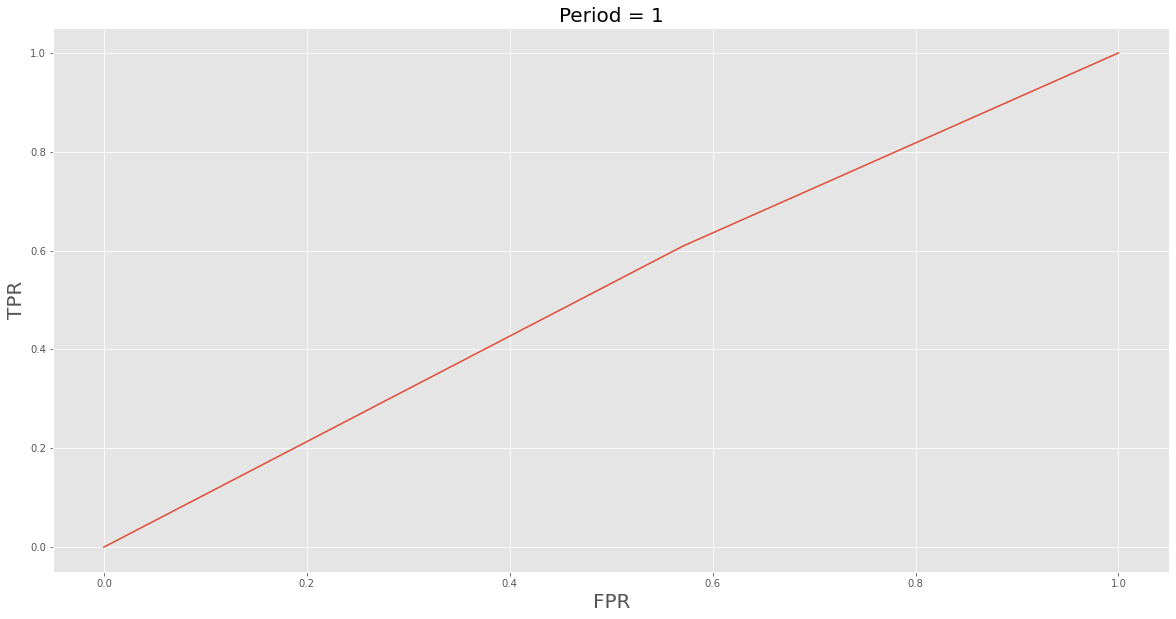

In [77]:
fpr,tpr,_=roc_curve(y_test,pred)
plt.plot(fpr,tpr)
plt.xlabel("FPR",{"fontsize":20})
plt.ylabel("TPR",{"fontsize":20})
period=1
plt.title(f'Period = {period}',{"fontsize":20})
plt.show()

In [108]:
def scoring(period,y_test,pred,plot=True,show=True):
    acc =accuracy_score(y_test,pred)
    pre=precision_score(y_test,pred)
    if show:
        print(f"Period - {period}")
        print(f'Acc - score = {accuracy_score(y_test,pred)}')
        print(f'Precision - score = {precision_score(y_test,pred)}')
        print('\n')
    fpr,tpr,_=roc_curve(y_test,pred)
    if plot:
        plt.plot(fpr,tpr)
        plt.xlabel("FPR",{"fontsize":20})
        plt.ylabel("TPR",{"fontsize":20})
        period=period
        plt.title(f'Period = {period}',{"fontsize":20})
        plt.show()
    return acc,pre

In [109]:
def model_create_and_predict(df,period,plot=True,show=True):
    x,y=x_y(df,period)
    x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=1,shuffle=False)
    clf = RandomForestClassifier(random_state=1)
    clf.fit(x_train,y_train)
    pred = clf.predict(x_test)
    acc,pre = scoring(period,y_test,pred,show=show,plot=plot)
    return acc,pre

Period - 1
Acc - score = 0.5204081632653061
Precision - score = 0.5230547550432276




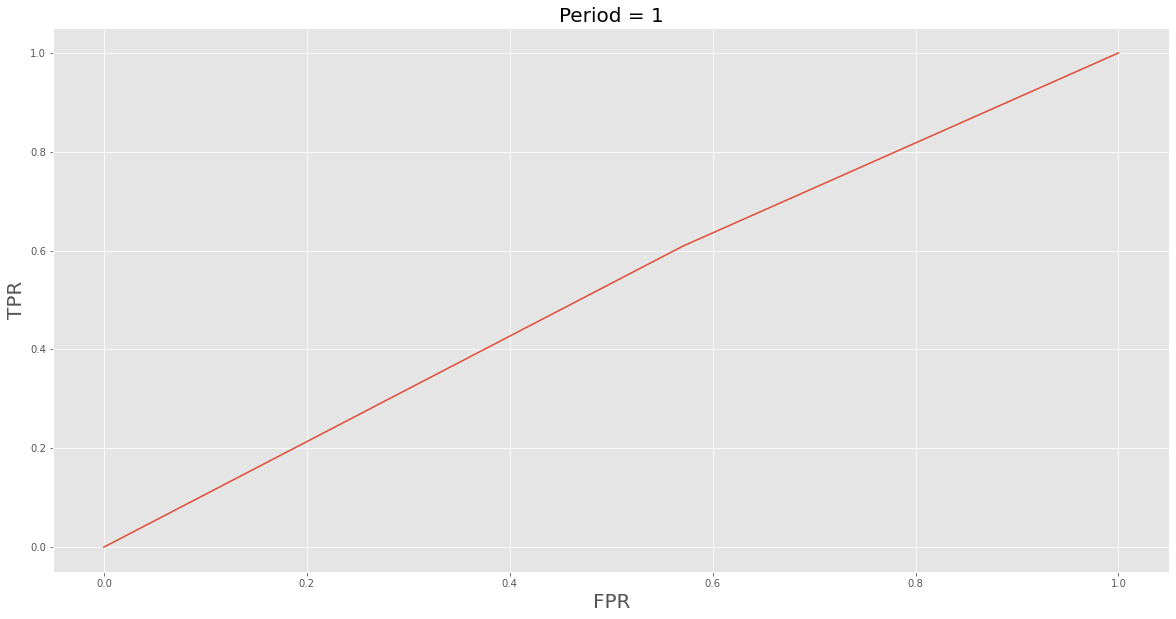

In [97]:
model_create_and_predict(df,1)

Period - 2
Acc - score = 0.532312925170068
Precision - score = 0.5361527967257844




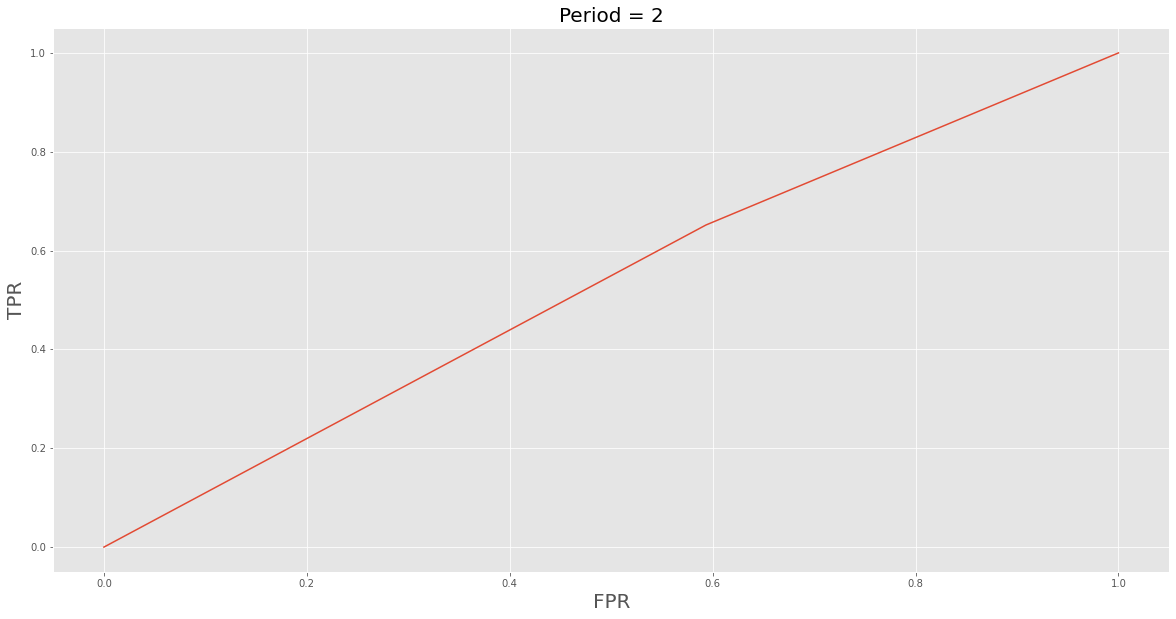

In [98]:
model_create_and_predict(df,2)

Period - 20
Acc - score = 0.520068317677199
Precision - score = 0.5422885572139303




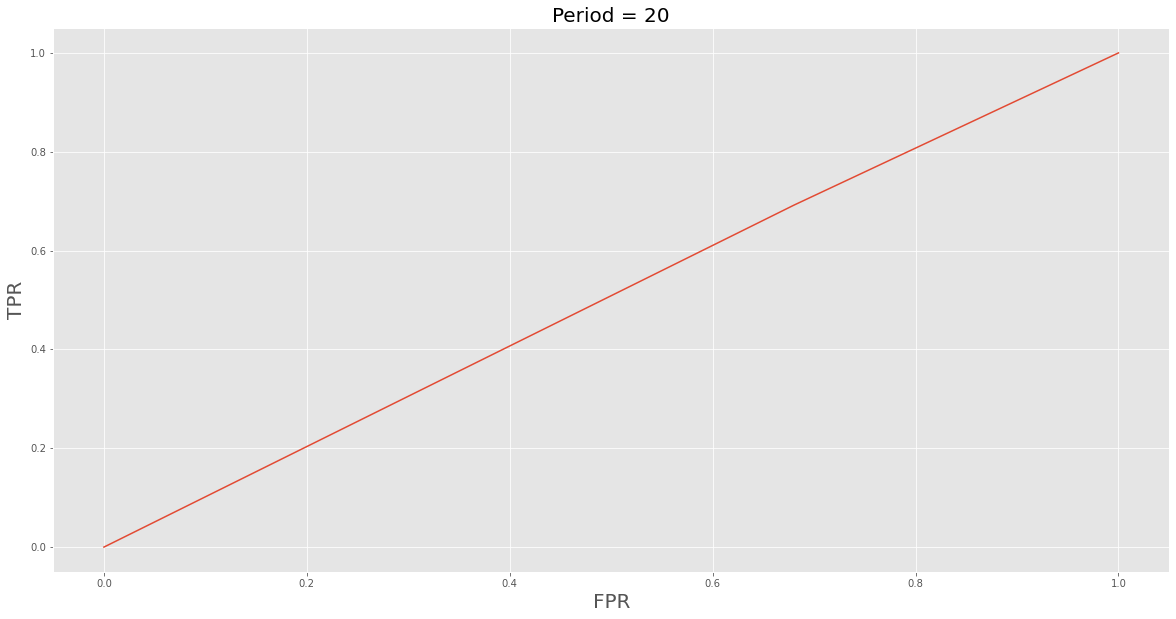

In [90]:
model_create_and_predict(df,20)

Period - 100
Acc - score = 0.6233653007846556
Precision - score = 0.5863821138211383




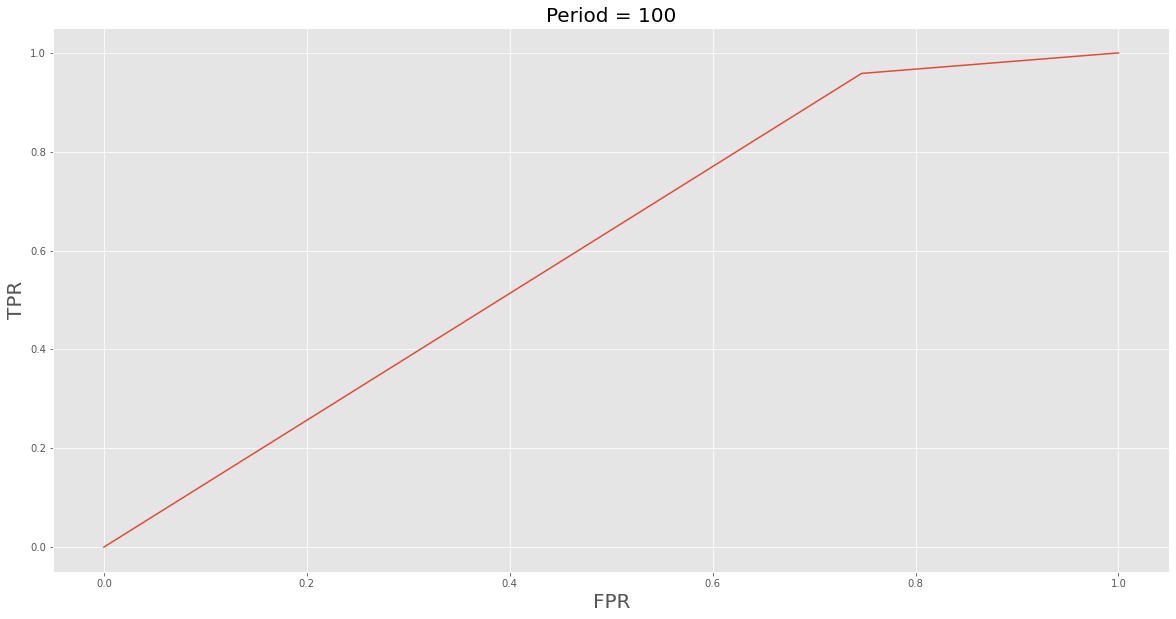

In [91]:
model_create_and_predict(df,100)

Period - 200
Acc - score = 0.5290957923008057
Precision - score = 0.5151228733459358




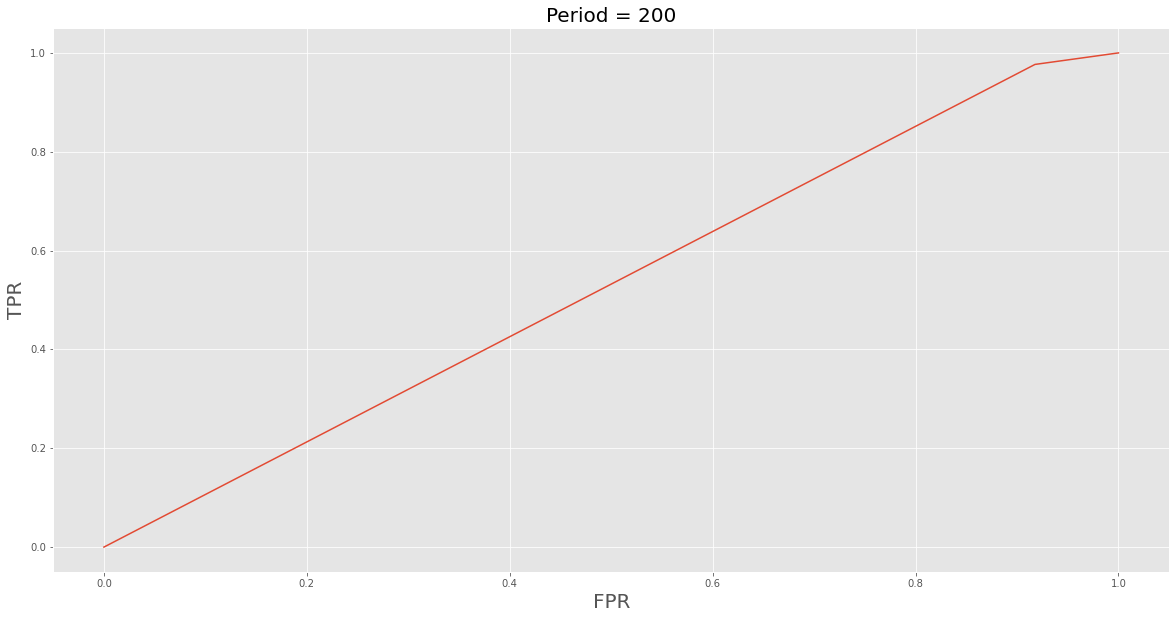

In [92]:
model_create_and_predict(df,200)

In [112]:
def find_optimal_period(df,plot=True):
    fig,ax = plt.subplots(ncols=2,nrows=1)
    x,acc,pre=[],[],[]
    for i in range(10,500,5):
        x.append(i)
        acc_,pre_=model_create_and_predict(df,i,plot=False,show=False)
        acc.append(acc_)
        pre.append(pre_)
    if plot:
        ax[0].plot(x,acc)
        ax[0].set_title(f'Acc plot')
        ax[0].set_xlabel(f'Period')
        ax[0].set_ylabel('Acc')
        ax[0].annotate(f"Period = {np.argmax(acc)}",xy=(np.argmax(acc),max(acc)))

        ax[1].plot(x,pre)
        ax[1].set_title(f'Precision plot')
        ax[1].set_xlabel(f'Period')
        ax[1].set_ylabel('Precision')
        ax[1].annotate(f"Period = {np.argmax(pre)}",xy=(np.argmax(pre),max(pre)))

        plt.show()   
        return x,acc,pre
    return x,acc,pre

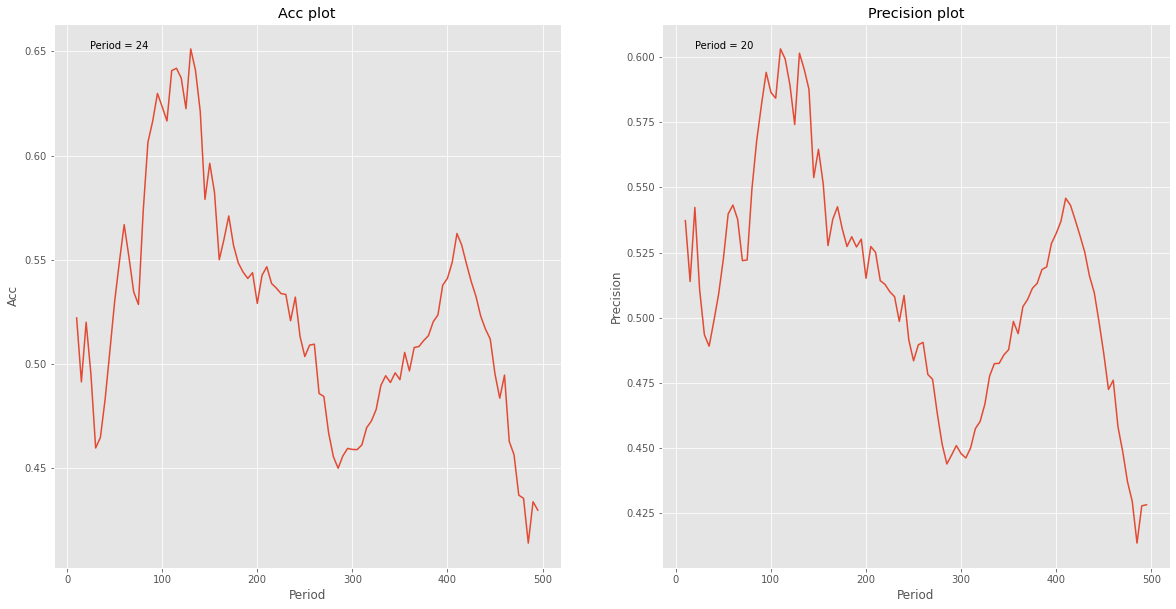

In [113]:
x,acc,pre=find_optimal_period(df)

In [117]:
def model_create(df,period):
    x,y=x_y(df,period)
    x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=1,shuffle=False)
    clf = RandomForestClassifier(random_state=1)
    clf.fit(x_train,y_train)
    return clf